# The Race Around The Netherlands - 2020
webscraping the leaderboard of 2020

more detailed description of the code can be found in the 2018 notebook.

In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import regex as re
import datetime

In [43]:
#for scraping java
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import presence_of_element_located

In [44]:
#CUSTOMIZE URL
url = 'https://ratn2020.legendstracking.com/#'

#set that you want to run the chrome headless (behind the scenes, in the background)
chrome_options = Options()
chrome_options.add_argument("--headless")

#insert absolute path of chrome driver
driver = webdriver.Chrome('C:/Users/jetsa/chromedriver.exe', options = chrome_options)
driver.get(url)

# Find and click the right button, using the tab's id
button = driver.find_element(By.ID, "leaderboard-icon")
button.click()

In [45]:
#From here on you can start using BS4. I will now also see the html=code that became visible by clicking the button.
source = driver.page_source

#close the webdriver
driver.close()

<html>
 <head>
  <meta content="https://www.legendstracking.com/_lib/img/logo-facebook.png" property="og:image"/>
  <meta content="1200" property="og:image:width"/>
  <meta content="630" property="og:image:height"/>
  <meta content="Legends Tracking" property="og:title"/>
  <meta content="https://www.legendstracking.com" property="og:url"/>
  <meta content="Live gps tracking services for your event" property="og:description"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <link href="../css/font-awesome.min.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol.css" rel="stylesheet" type="text/css"/>
  <link href="../css/trackers1.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol3-sidebar.css" rel="stylesheet" type="text/css"/>
  <link href="../css/ol3-layerswitcher.css" rel="stylesheet" type="text/css"/>
  <link href="../css/flags.css" rel="stylesheet" type="text/css"/>
  <link href="../dev/css/j
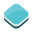

In [46]:
#make the soup
soup = BeautifulSoup(source, 'html')
print(soup.prettify())

In [47]:
#MIGHT NEED CUSTOMIZATION, check if you find the right table when you choose table 2.
#The table should contain information about the timings of the soloriders.
#this only works when put in a different cell.Maybe because you'll have to wait till the previous line is loaded?
table_solo = soup.find_all('table')[2]
table_solo

<table><tbody><tr><td colspan="6"></td><td>Start</td><td>Timing 1</td><td>Timing 2</td><td>Timing 3</td><td>Timing 4</td><td>Timing 5</td><td>Timing 6</td><td>Timing 7</td><td>Timing 8</td><td>Timing 9</td><td>Finish</td></tr><tr><td>1)</td><td style="vertical-align:top">5</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-nl" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars fa-fw"></i></td><td>Patijn</td><td>Flip</td><td><b>Sat 8:00</b></td><td><span id="leaderboard_31388_1"><b>Sat 13:15</b></span></td><td><span id="leaderboard_31388_2"><b>Sun 0:16</b></span></td><td><span id="leaderboard_31388_3"><b>Sun 6:25</b></span></td><td><span id="leaderboard_31388_4"><b>Sun 14:23</b></span></td><td><span id="leaderboard_31388_5"><b>Sun 21:02</b></span></td><td><span id="leaderboard_31388_6"><b>Mon 11:40</b></span></td><td><span id="leaderboard_31388_7"><b>Mon 15:59</b></span></td><td><span id="leaderbo

In [48]:
#find all the rows from this specific table
rows_solo = table_solo.findChildren('tr')

#convert each elements into a string to prevent an even more horrible mess
string_rows = []

for i in rows_solo:
    i = str(i)
    string_rows.append(i)
# print(string_rows[7]) #test

#convert the string+rows into a dataframe. Name the column "riders"
solo_riders = pd.DataFrame(string_rows)
solo_riders.columns=["riders"]
solo_riders.head()

#split the strings on </td> (this is removed)
solo_riders = solo_riders["riders"].str.split("</td>", expand = True)
solo_riders.head() #to check which columns you should delete in the next step

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"<tr><td colspan=""6"">",<td>Start,<td>Timing 1,<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top"">5","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Patijn,<td>Flip,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31388_1""><b>Sat 13:1...","<td><span id=""leaderboard_31388_2""><b>Sun 0:16...","<td><span id=""leaderboard_31388_3""><b>Sun 6:25...","<td><span id=""leaderboard_31388_4""><b>Sun 14:2...","<td><span id=""leaderboard_31388_5""><b>Sun 21:0...","<td><span id=""leaderboard_31388_6""><b>Mon 11:4...","<td><span id=""leaderboard_31388_7""><b>Mon 15:5...","<td><span id=""leaderboard_31388_8""><b>Tue 13:0...","<td><span id=""leaderboard_31388_9""><b>Tue 21:3...","<td><span id=""leaderboard_31388_10""><b>Wed 11:...",</tr>
2,<tr><td>2),"<td style=""vertical-align:top"">148","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Svendsen,<td>Klaus,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31382_1""><b>Sat 14:2...","<td><span id=""leaderboard_31382_2""><b>Sun 12:4...","<td><span id=""leaderboard_31382_3""><b>Sun 16:1...","<td><span id=""leaderboard_31382_4""><b>Mon 12:5...","<td><span id=""leaderboard_31382_5""><b>Tue 8:04...","<td><span id=""leaderboard_31382_6""><b>Wed 9:30...","<td><span id=""leaderboard_31382_7""><b>Wed 14:1...","<td><span id=""leaderboard_31382_8""><b>Thu 17:1...","<td><span id=""leaderboard_31382_9""><b>Fri 13:3...","<td><span id=""leaderboard_31382_10""><b>Sat 4:5...",</tr>
3,<tr><td>3),"<td style=""vertical-align:top"">44","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Verheijen,<td>Bart,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31277_1""></span>","<td><span id=""leaderboard_31277_2""><b>Sun 0:41...","<td><span id=""leaderboard_31277_3""><b>Sun 5:51...","<td><span id=""leaderboard_31277_4""><b>Sun 13:0...","<td><span id=""leaderboard_31277_5""><b>Sun 19:5...","<td><span id=""leaderboard_31277_6""><b>Mon 12:5...","<td><span id=""leaderboard_31277_7""><b>Mon 17:0...","<td><span id=""leaderboard_31277_8""><b>Tue 11:1...","<td><span id=""leaderboard_31277_9""><b>Tue 20:1...","<td><span id=""leaderboard_31277_10""><b>Wed 11:...",</tr>
4,<tr><td>4),"<td style=""vertical-align:top"">32","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Wolfs,<td>Theo,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31359_1""><b>Sat 15:0...","<td><span id=""leaderboard_31359_2""><b>Sun 16:3...","<td><span id=""leaderboard_31359_3""><b>Sun 20:1...","<td><span id=""leaderboard_31359_4""><b>Mon 16:3...","<td><span id=""leaderboard_31359_5""><b>Tue 12:4...","<td><span id=""leaderboard_31359_6""><b>Wed 12:3...","<td><span id=""leaderboard_31359_7""><b>Wed 16:3...","<td><span id=""leaderboard_31359_8""><b>Thu 19:0...","<td><span id=""leaderboard_31359_9""><b>Fri 16:5...","<td><span id=""leaderboard_31359_10""><b>Sat 17:...",</tr>


In [49]:
# MIGHT NEED CUSTOMIZATION - inspect the head and decide which columns to drop. In this (2019) case: colnr 1; 2; 17
solo_riders.drop(solo_riders.columns[[1,2,17]], axis=1, inplace = True)

#rename columns
solo_riders.columns=["Place", "MarsVenus","Lastname", "Firstname", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]

#check which rows are empty/useless and you should drop in the next cell. You'll need to see all rows (display.max_rows).
# In this case the rows you want to delete are nr 0; 61, 77
pd.set_option('display.max_rows', solo_riders.shape[0]+1)
solo_riders

,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,"<tr><td colspan=""6"">",<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Patijn,<td>Flip,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31388_1""><b>Sat 13:1...","<td><span id=""leaderboard_31388_2""><b>Sun 0:16...","<td><span id=""leaderboard_31388_3""><b>Sun 6:25...","<td><span id=""leaderboard_31388_4""><b>Sun 14:2...","<td><span id=""leaderboard_31388_5""><b>Sun 21:0...","<td><span id=""leaderboard_31388_6""><b>Mon 11:4...","<td><span id=""leaderboard_31388_7""><b>Mon 15:5...","<td><span id=""leaderboard_31388_8""><b>Tue 13:0...","<td><span id=""leaderboard_31388_9""><b>Tue 21:3...","<td><span id=""leaderboard_31388_10""><b>Wed 11:..."
2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Svendsen,<td>Klaus,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31382_1""><b>Sat 14:2...","<td><span id=""leaderboard_31382_2""><b>Sun 12:4...","<td><span id=""leaderboard_31382_3""><b>Sun 16:1...","<td><span id=""leaderboard_31382_4""><b>Mon 12:5...","<td><span id=""leaderboard_31382_5""><b>Tue 8:04...","<td><span id=""leaderboard_31382_6""><b>Wed 9:30...","<td><span id=""leaderboard_31382_7""><b>Wed 14:1...","<td><span id=""leaderboard_31382_8""><b>Thu 17:1...","<td><span id=""leaderboard_31382_9""><b>Fri 13:3...","<td><span id=""leaderboard_31382_10""><b>Sat 4:5..."
3,<tr><td>3),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Verheijen,<td>Bart,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31277_1""></span>","<td><span id=""leaderboard_31277_2""><b>Sun 0:41...","<td><span id=""leaderboard_31277_3""><b>Sun 5:51...","<td><span id=""leaderboard_31277_4""><b>Sun 13:0...","<td><span id=""leaderboard_31277_5""><b>Sun 19:5...","<td><span id=""leaderboard_31277_6""><b>Mon 12:5...","<td><span id=""leaderboard_31277_7""><b>Mon 17:0...","<td><span id=""leaderboard_31277_8""><b>Tue 11:1...","<td><span id=""leaderboard_31277_9""><b>Tue 20:1...","<td><span id=""leaderboard_31277_10""><b>Wed 11:..."
4,<tr><td>4),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Wolfs,<td>Theo,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31359_1""><b>Sat 15:0...","<td><span id=""leaderboard_31359_2""><b>Sun 16:3...","<td><span id=""leaderboard_31359_3""><b>Sun 20:1...","<td><span id=""leaderboard_31359_4""><b>Mon 16:3...","<td><span id=""leaderboard_31359_5""><b>Tue 12:4...","<td><span id=""leaderboard_31359_6""><b>Wed 12:3...","<td><span id=""leaderboard_31359_7""><b>Wed 16:3...","<td><span id=""leaderboard_31359_8""><b>Thu 19:0...","<td><span id=""leaderboard_31359_9""><b>Fri 16:5...","<td><span id=""leaderboard_31359_10""><b>Sat 17:..."
5,<tr><td>5),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Kuipers,<td>Ruerd,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31350_1""></span>","<td><span id=""leaderboard_31350_2""><b>Sun 17:0...","<td><span id=""leaderboard_31350_3""><b>Mon 7:39...","<td><span id=""leaderboard_31350_4""><b>Mon 17:0...","<td><span id=""leaderboard_31350_5""><b>Tue 13:4...","<td><span id=""leaderboard_31350_6""><b>Wed 16:1...","<td><span id=""leaderboard_31350_7""><b>Thu 10:0...","<td><span id=""leaderboard_31350_8""><b>Fri 15:5...","<td><span id=""leaderboard_31350_9""><b>Sat 13:0...","<td><span id=""leaderboard_31350_10""><b>Sun 14:..."
6,<tr><td>6),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Dobrinkat,<td>Rainer,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31345_1""></span>","<td><span id=""leaderboard_31345_2""><b>Sun 8:25...","<td><span id=""leaderboard_31345_3""><b>Sun 15:3...","<td><span id=""leaderboard_31345_4""><b>Mon 12:1...","<td><span id=""leaderboard_31345_5""><b>Mon 21:5...","<td><span id=""leaderboard_31345_6""><b>Tue 18:1...","<td><span id=""leaderboard_31345_7""><b>W

In [50]:
#CUSTOMIZE: drop useless ROWS
solo_riders = solo_riders.drop([0, 61, 77]).reset_index()
solo_riders.head()

,index,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Patijn,<td>Flip,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31388_1""><b>Sat 13:1...","<td><span id=""leaderboard_31388_2""><b>Sun 0:16...","<td><span id=""leaderboard_31388_3""><b>Sun 6:25...","<td><span id=""leaderboard_31388_4""><b>Sun 14:2...","<td><span id=""leaderboard_31388_5""><b>Sun 21:0...","<td><span id=""leaderboard_31388_6""><b>Mon 11:4...","<td><span id=""leaderboard_31388_7""><b>Mon 15:5...","<td><span id=""leaderboard_31388_8""><b>Tue 13:0...","<td><span id=""leaderboard_31388_9""><b>Tue 21:3...","<td><span id=""leaderboard_31388_10""><b>Wed 11:..."
1,2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Svendsen,<td>Klaus,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31382_1""><b>Sat 14:2...","<td><span id=""leaderboard_31382_2""><b>Sun 12:4...","<td><span id=""leaderboard_31382_3""><b>Sun 16:1...","<td><span id=""leaderboard_31382_4""><b>Mon 12:5...","<td><span id=""leaderboard_31382_5""><b>Tue 8:04...","<td><span id=""leaderboard_31382_6""><b>Wed 9:30...","<td><span id=""leaderboard_31382_7""><b>Wed 14:1...","<td><span id=""leaderboard_31382_8""><b>Thu 17:1...","<td><span id=""leaderboard_31382_9""><b>Fri 13:3...","<td><span id=""leaderboard_31382_10""><b>Sat 4:5..."
2,3,<tr><td>3),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Verheijen,<td>Bart,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31277_1""></span>","<td><span id=""leaderboard_31277_2""><b>Sun 0:41...","<td><span id=""leaderboard_31277_3""><b>Sun 5:51...","<td><span id=""leaderboard_31277_4""><b>Sun 13:0...","<td><span id=""leaderboard_31277_5""><b>Sun 19:5...","<td><span id=""leaderboard_31277_6""><b>Mon 12:5...","<td><span id=""leaderboard_31277_7""><b>Mon 17:0...","<td><span id=""leaderboard_31277_8""><b>Tue 11:1...","<td><span id=""leaderboard_31277_9""><b>Tue 20:1...","<td><span id=""leaderboard_31277_10""><b>Wed 11:..."
3,4,<tr><td>4),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Wolfs,<td>Theo,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31359_1""><b>Sat 15:0...","<td><span id=""leaderboard_31359_2""><b>Sun 16:3...","<td><span id=""leaderboard_31359_3""><b>Sun 20:1...","<td><span id=""leaderboard_31359_4""><b>Mon 16:3...","<td><span id=""leaderboard_31359_5""><b>Tue 12:4...","<td><span id=""leaderboard_31359_6""><b>Wed 12:3...","<td><span id=""leaderboard_31359_7""><b>Wed 16:3...","<td><span id=""leaderboard_31359_8""><b>Thu 19:0...","<td><span id=""leaderboard_31359_9""><b>Fri 16:5...","<td><span id=""leaderboard_31359_10""><b>Sat 17:..."
4,5,<tr><td>5),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Kuipers,<td>Ruerd,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31350_1""></span>","<td><span id=""leaderboard_31350_2""><b>Sun 17:0...","<td><span id=""leaderboard_31350_3""><b>Mon 7:39...","<td><span id=""leaderboard_31350_4""><b>Mon 17:0...","<td><span id=""leaderboard_31350_5""><b>Tue 13:4...","<td><span id=""leaderboard_31350_6""><b>Wed 16:1...","<td><span id=""leaderboard_31350_7""><b>Thu 10:0...","<td><span id=""leaderboard_31350_8""><b>Fri 15:5...","<td><span id=""leaderboard_31350_9""><b>Sat 13:0...","<td><span id=""leaderboard_31350_10""><b>Sun 14:..."


In [51]:
#extract the gender
gender = []

for row in solo_riders["MarsVenus"]:
    if 'mars' in row:
        gender.append('male')
    if 'venus' in row:
        gender.append('female')

# Add gender as a column to the solo_riders dataframe and drop the MarsVenus column and the automatically created index-column
solo_riders["Gender"] = gender        
solo_riders = solo_riders.drop(solo_riders[["MarsVenus", "index"]], axis = 1)
solo_riders.head()

,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,<tr><td>1),<td>Patijn,<td>Flip,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31388_1""><b>Sat 13:1...","<td><span id=""leaderboard_31388_2""><b>Sun 0:16...","<td><span id=""leaderboard_31388_3""><b>Sun 6:25...","<td><span id=""leaderboard_31388_4""><b>Sun 14:2...","<td><span id=""leaderboard_31388_5""><b>Sun 21:0...","<td><span id=""leaderboard_31388_6""><b>Mon 11:4...","<td><span id=""leaderboard_31388_7""><b>Mon 15:5...","<td><span id=""leaderboard_31388_8""><b>Tue 13:0...","<td><span id=""leaderboard_31388_9""><b>Tue 21:3...","<td><span id=""leaderboard_31388_10""><b>Wed 11:...",male
1,<tr><td>2),<td>Svendsen,<td>Klaus,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31382_1""><b>Sat 14:2...","<td><span id=""leaderboard_31382_2""><b>Sun 12:4...","<td><span id=""leaderboard_31382_3""><b>Sun 16:1...","<td><span id=""leaderboard_31382_4""><b>Mon 12:5...","<td><span id=""leaderboard_31382_5""><b>Tue 8:04...","<td><span id=""leaderboard_31382_6""><b>Wed 9:30...","<td><span id=""leaderboard_31382_7""><b>Wed 14:1...","<td><span id=""leaderboard_31382_8""><b>Thu 17:1...","<td><span id=""leaderboard_31382_9""><b>Fri 13:3...","<td><span id=""leaderboard_31382_10""><b>Sat 4:5...",male
2,<tr><td>3),<td>Verheijen,<td>Bart,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31277_1""></span>","<td><span id=""leaderboard_31277_2""><b>Sun 0:41...","<td><span id=""leaderboard_31277_3""><b>Sun 5:51...","<td><span id=""leaderboard_31277_4""><b>Sun 13:0...","<td><span id=""leaderboard_31277_5""><b>Sun 19:5...","<td><span id=""leaderboard_31277_6""><b>Mon 12:5...","<td><span id=""leaderboard_31277_7""><b>Mon 17:0...","<td><span id=""leaderboard_31277_8""><b>Tue 11:1...","<td><span id=""leaderboard_31277_9""><b>Tue 20:1...","<td><span id=""leaderboard_31277_10""><b>Wed 11:...",male
3,<tr><td>4),<td>Wolfs,<td>Theo,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31359_1""><b>Sat 15:0...","<td><span id=""leaderboard_31359_2""><b>Sun 16:3...","<td><span id=""leaderboard_31359_3""><b>Sun 20:1...","<td><span id=""leaderboard_31359_4""><b>Mon 16:3...","<td><span id=""leaderboard_31359_5""><b>Tue 12:4...","<td><span id=""leaderboard_31359_6""><b>Wed 12:3...","<td><span id=""leaderboard_31359_7""><b>Wed 16:3...","<td><span id=""leaderboard_31359_8""><b>Thu 19:0...","<td><span id=""leaderboard_31359_9""><b>Fri 16:5...","<td><span id=""leaderboard_31359_10""><b>Sat 17:...",male
4,<tr><td>5),<td>Kuipers,<td>Ruerd,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31350_1""></span>","<td><span id=""leaderboard_31350_2""><b>Sun 17:0...","<td><span id=""leaderboard_31350_3""><b>Mon 7:39...","<td><span id=""leaderboard_31350_4""><b>Mon 17:0...","<td><span id=""leaderboard_31350_5""><b>Tue 13:4...","<td><span id=""leaderboard_31350_6""><b>Wed 16:1...","<td><span id=""leaderboard_31350_7""><b>Thu 10:0...","<td><span id=""leaderboard_31350_8""><b>Fri 15:5...","<td><span id=""leaderboard_31350_9""><b>Sat 13:0...","<td><span id=""leaderboard_31350_10""><b>Sun 14:...",male


In [52]:
#CUSTOMIZE append columns with start date&time, and wether it's a solo or duo ride.
StartDate = datetime.datetime(2020, 8, 29, 8)
solo_riders.insert(0, 'Solo or Duo', 'Solo')
solo_riders.insert(0, 'StartDate', StartDate)

solo_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2020-08-29 08:00:00,Solo,<tr><td>1),<td>Patijn,<td>Flip,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31388_1""><b>Sat 13:1...","<td><span id=""leaderboard_31388_2""><b>Sun 0:16...","<td><span id=""leaderboard_31388_3""><b>Sun 6:25...","<td><span id=""leaderboard_31388_4""><b>Sun 14:2...","<td><span id=""leaderboard_31388_5""><b>Sun 21:0...","<td><span id=""leaderboard_31388_6""><b>Mon 11:4...","<td><span id=""leaderboard_31388_7""><b>Mon 15:5...","<td><span id=""leaderboard_31388_8""><b>Tue 13:0...","<td><span id=""leaderboard_31388_9""><b>Tue 21:3...","<td><span id=""leaderboard_31388_10""><b>Wed 11:...",male
1,2020-08-29 08:00:00,Solo,<tr><td>2),<td>Svendsen,<td>Klaus,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31382_1""><b>Sat 14:2...","<td><span id=""leaderboard_31382_2""><b>Sun 12:4...","<td><span id=""leaderboard_31382_3""><b>Sun 16:1...","<td><span id=""leaderboard_31382_4""><b>Mon 12:5...","<td><span id=""leaderboard_31382_5""><b>Tue 8:04...","<td><span id=""leaderboard_31382_6""><b>Wed 9:30...","<td><span id=""leaderboard_31382_7""><b>Wed 14:1...","<td><span id=""leaderboard_31382_8""><b>Thu 17:1...","<td><span id=""leaderboard_31382_9""><b>Fri 13:3...","<td><span id=""leaderboard_31382_10""><b>Sat 4:5...",male
2,2020-08-29 08:00:00,Solo,<tr><td>3),<td>Verheijen,<td>Bart,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31277_1""></span>","<td><span id=""leaderboard_31277_2""><b>Sun 0:41...","<td><span id=""leaderboard_31277_3""><b>Sun 5:51...","<td><span id=""leaderboard_31277_4""><b>Sun 13:0...","<td><span id=""leaderboard_31277_5""><b>Sun 19:5...","<td><span id=""leaderboard_31277_6""><b>Mon 12:5...","<td><span id=""leaderboard_31277_7""><b>Mon 17:0...","<td><span id=""leaderboard_31277_8""><b>Tue 11:1...","<td><span id=""leaderboard_31277_9""><b>Tue 20:1...","<td><span id=""leaderboard_31277_10""><b>Wed 11:...",male
3,2020-08-29 08:00:00,Solo,<tr><td>4),<td>Wolfs,<td>Theo,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31359_1""><b>Sat 15:0...","<td><span id=""leaderboard_31359_2""><b>Sun 16:3...","<td><span id=""leaderboard_31359_3""><b>Sun 20:1...","<td><span id=""leaderboard_31359_4""><b>Mon 16:3...","<td><span id=""leaderboard_31359_5""><b>Tue 12:4...","<td><span id=""leaderboard_31359_6""><b>Wed 12:3...","<td><span id=""leaderboard_31359_7""><b>Wed 16:3...","<td><span id=""leaderboard_31359_8""><b>Thu 19:0...","<td><span id=""leaderboard_31359_9""><b>Fri 16:5...","<td><span id=""leaderboard_31359_10""><b>Sat 17:...",male
4,2020-08-29 08:00:00,Solo,<tr><td>5),<td>Kuipers,<td>Ruerd,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31350_1""></span>","<td><span id=""leaderboard_31350_2""><b>Sun 17:0...","<td><span id=""leaderboard_31350_3""><b>Mon 7:39...","<td><span id=""leaderboard_31350_4""><b>Mon 17:0...","<td><span id=""leaderboard_31350_5""><b>Tue 13:4...","<td><span id=""leaderboard_31350_6""><b>Wed 16:1...","<td><span id=""leaderboard_31350_7""><b>Thu 10:0...","<td><span id=""leaderboard_31350_8""><b>Fri 15:5...","<td><span id=""leaderboard_31350_9""><b>Sat 13:0...","<td><span id=""leaderboard_31350_10""><b>Sun 14:...",male


### Prepare the duo-table 2020

In [53]:
#grab the duo table
table_duo = soup.find_all('table')[3]
table_duo

<table><tbody><tr><td colspan="6"></td><td>Start</td><td>Timing 1</td><td>Timing 2</td><td>Timing 3</td><td>Timing 4</td><td>Timing 5</td><td>Timing 6</td><td>Timing 7</td><td>Timing 8</td><td>Timing 9</td><td>Finish</td></tr><tr><td>1)</td><td style="vertical-align:top">1922</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-at" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars-double fa-fw"></i></td><td>Leitner-Finger</td><td></td><td><b>Sat 8:00</b></td><td><span id="leaderboard_31370_1"><b>Sat 13:20</b></span></td><td><span id="leaderboard_31370_2"><b>Sun 7:38</b></span></td><td><span id="leaderboard_31370_3"><b>Sun 11:59</b></span></td><td><span id="leaderboard_31370_4"><b>Sun 20:49</b></span></td><td><span id="leaderboard_31370_5"><b>Mon 14:34</b></span></td><td><span id="leaderboard_31370_6"><b>Tue 11:11</b></span></td><td><span id="leaderboard_31370_7"><b>Tue 15:50</b></span></td><td><sp

In [54]:
#grab the rows
rows_duo = table_duo.findChildren('tr')

#convert each elements into a string to prevent an even more horrible mess
string_rows = []

for i in rows_duo:
    i = str(i)
    string_rows.append(i)
print(string_rows[3])

<tr><td>3)</td><td style="vertical-align:top">9094</td><td style="vertical-align:top;"><div style="min-width:16px;"><img class="flag flag-nl" src="../img/blank.gif"/></div></td><td style="vertical-align:top"><i aria-hidden="true" class="fa fa-mars-double fa-fw"></i></td><td>Mulders-Croonen</td><td></td><td><b>Sat 8:00</b></td><td><span id="leaderboard_31367_1"><b>Sat 13:52</b></span></td><td><span id="leaderboard_31367_2"><b>Sun 12:17</b></span></td><td><span id="leaderboard_31367_3"><b>Sun 16:26</b></span></td><td><span id="leaderboard_31367_4"><b>Mon 10:53</b></span></td><td><span id="leaderboard_31367_5"></span></td><td><span id="leaderboard_31367_6"><b>Tue 15:19</b></span></td><td><span id="leaderboard_31367_7"><b>Tue 19:29</b></span></td><td><span id="leaderboard_31367_8"><b>Wed 18:55</b></span></td><td><span id="leaderboard_31367_9"><b>Thu 15:21</b></span></td><td><span id="leaderboard_31367_10"><b>Fri 12:48</b></span></td></tr>


In [55]:
#convert the string+rows into a dataframe. Name the column "riders"
duo_riders = pd.DataFrame(string_rows)
duo_riders.columns=["riders"]
duo_riders.head()

#split the strings on </td>
duo_riders = duo_riders["riders"].str.split("</td>", expand = True)
duo_riders

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"<tr><td colspan=""6"">",<td>Start,<td>Timing 1,<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top"">1922","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Leitner-Finger,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31370_1""><b>Sat 13:2...","<td><span id=""leaderboard_31370_2""><b>Sun 7:38...","<td><span id=""leaderboard_31370_3""><b>Sun 11:5...","<td><span id=""leaderboard_31370_4""><b>Sun 20:4...","<td><span id=""leaderboard_31370_5""><b>Mon 14:3...","<td><span id=""leaderboard_31370_6""><b>Tue 11:1...","<td><span id=""leaderboard_31370_7""><b>Tue 15:5...","<td><span id=""leaderboard_31370_8""><b>Wed 13:3...","<td><span id=""leaderboard_31370_9""><b>Thu 11:2...","<td><span id=""leaderboard_31370_10""><b>Fri 0:0...",</tr>
2,<tr><td>2),"<td style=""vertical-align:top"">1617","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Frans-Frans,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31373_1""><b>Sat 13:0...","<td><span id=""leaderboard_31373_2""><b>Sun 2:08...","<td><span id=""leaderboard_31373_3""><b>Sun 8:56...","<td><span id=""leaderboard_31373_4""><b>Sun 18:5...","<td><span id=""leaderboard_31373_5""><b>Mon 10:1...","<td><span id=""leaderboard_31373_6""><b>Tue 0:49...","<td><span id=""leaderboard_31373_7""><b>Tue 8:27...","<td><span id=""leaderboard_31373_8""><b>Wed 6:05...","<td><span id=""leaderboard_31373_9""><b>Wed 15:1...","<td><span id=""leaderboard_31373_10""><b>Thu 1:3...",</tr>
3,<tr><td>3),"<td style=""vertical-align:top"">9094","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Mulders-Croonen,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31367_1""><b>Sat 13:5...","<td><span id=""leaderboard_31367_2""><b>Sun 12:1...","<td><span id=""leaderboard_31367_3""><b>Sun 16:2...","<td><span id=""leaderboard_31367_4""><b>Mon 10:5...","<td><span id=""leaderboard_31367_5""></span>","<td><span id=""leaderboard_31367_6""><b>Tue 15:1...","<td><span id=""leaderboard_31367_7""><b>Tue 19:2...","<td><span id=""leaderboard_31367_8""><b>Wed 18:5...","<td><span id=""leaderboard_31367_9""><b>Thu 15:2...","<td><span id=""leaderboard_31367_10""><b>Fri 12:...",</tr>
4,"<tr><td colspan=""8""><b>DNF</b>",</tr>,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,<tr><td>,"<td style=""vertical-align:top"">4648","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Casier-Vanbillemont,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31379_1""><b>Sat 15:2...","<td><span id=""leaderboard_31379_2""></span>","<td><span id=""leaderboard_31379_3""><b>Mon 10:0...","<td><span id=""leaderboard_31379_4""><b>Tue 9:02...","<td><span id=""leaderboard_31379_5""></span>","<td><span id=""leaderboard_31379_6""></span>","<td><span id=""leaderboard_31379_7""></span>","<td><span id=""leaderboard_31379_8""></span>","<td><span id=""leaderboard_31379_9""></span>","<td><span id=""leaderboard_31379_10""><b>Wed 11:...",</tr>
6,"<tr><td colspan=""8""><b>DNS</b>",</tr>,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,<tr><td>,"<td style=""vertical-align:top"">6673","<td style=""vertical-align:top;""><div style=""mi...","<td style=""vertical-align:top""><i aria-hidden=...",<td>Krämer-Reindl,<td>,</tr>,None,None,None,None,None,None,None,None,None,None,None


In [56]:
# CUSTOMIZE drop useless columns: colnr 1; 2; 17
duo_riders = duo_riders.drop(duo_riders.columns[[1,2,17]], axis=1)
duo_riders

#rename columns
duo_riders.columns=["Place", "MarsVenus","Lastname", "Firstname", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]

#check which rows are empty/useless and you should drop in the next cell. 
duo_riders

,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,"<tr><td colspan=""6"">",<td>Timing 2,<td>Timing 3,<td>Timing 4,<td>Timing 5,<td>Timing 6,<td>Timing 7,<td>Timing 8,<td>Timing 9,<td>Finish,</tr>,None,None,None,None
1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Leitner-Finger,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31370_1""><b>Sat 13:2...","<td><span id=""leaderboard_31370_2""><b>Sun 7:38...","<td><span id=""leaderboard_31370_3""><b>Sun 11:5...","<td><span id=""leaderboard_31370_4""><b>Sun 20:4...","<td><span id=""leaderboard_31370_5""><b>Mon 14:3...","<td><span id=""leaderboard_31370_6""><b>Tue 11:1...","<td><span id=""leaderboard_31370_7""><b>Tue 15:5...","<td><span id=""leaderboard_31370_8""><b>Wed 13:3...","<td><span id=""leaderboard_31370_9""><b>Thu 11:2...","<td><span id=""leaderboard_31370_10""><b>Fri 0:0..."
2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Frans-Frans,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31373_1""><b>Sat 13:0...","<td><span id=""leaderboard_31373_2""><b>Sun 2:08...","<td><span id=""leaderboard_31373_3""><b>Sun 8:56...","<td><span id=""leaderboard_31373_4""><b>Sun 18:5...","<td><span id=""leaderboard_31373_5""><b>Mon 10:1...","<td><span id=""leaderboard_31373_6""><b>Tue 0:49...","<td><span id=""leaderboard_31373_7""><b>Tue 8:27...","<td><span id=""leaderboard_31373_8""><b>Wed 6:05...","<td><span id=""leaderboard_31373_9""><b>Wed 15:1...","<td><span id=""leaderboard_31373_10""><b>Thu 1:3..."
3,<tr><td>3),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Mulders-Croonen,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31367_1""><b>Sat 13:5...","<td><span id=""leaderboard_31367_2""><b>Sun 12:1...","<td><span id=""leaderboard_31367_3""><b>Sun 16:2...","<td><span id=""leaderboard_31367_4""><b>Mon 10:5...","<td><span id=""leaderboard_31367_5""></span>","<td><span id=""leaderboard_31367_6""><b>Tue 15:1...","<td><span id=""leaderboard_31367_7""><b>Tue 19:2...","<td><span id=""leaderboard_31367_8""><b>Wed 18:5...","<td><span id=""leaderboard_31367_9""><b>Thu 15:2...","<td><span id=""leaderboard_31367_10""><b>Fri 12:..."
4,"<tr><td colspan=""8""><b>DNF</b>",None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Casier-Vanbillemont,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31379_1""><b>Sat 15:2...","<td><span id=""leaderboard_31379_2""></span>","<td><span id=""leaderboard_31379_3""><b>Mon 10:0...","<td><span id=""leaderboard_31379_4""><b>Tue 9:02...","<td><span id=""leaderboard_31379_5""></span>","<td><span id=""leaderboard_31379_6""></span>","<td><span id=""leaderboard_31379_7""></span>","<td><span id=""leaderboard_31379_8""></span>","<td><span id=""leaderboard_31379_9""></span>","<td><span id=""leaderboard_31379_10""><b>Wed 11:..."
6,"<tr><td colspan=""8""><b>DNS</b>",None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Krämer-Reindl,<td>,</tr>,None,None,None,None,None,None,None,None,None,None


In [57]:
#CUSTOMIZE: drop useless ROWS
duo_riders = duo_riders.drop([0, 4, 6]).reset_index()
duo_riders.head()

,index,Place,MarsVenus,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,1,<tr><td>1),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Leitner-Finger,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31370_1""><b>Sat 13:2...","<td><span id=""leaderboard_31370_2""><b>Sun 7:38...","<td><span id=""leaderboard_31370_3""><b>Sun 11:5...","<td><span id=""leaderboard_31370_4""><b>Sun 20:4...","<td><span id=""leaderboard_31370_5""><b>Mon 14:3...","<td><span id=""leaderboard_31370_6""><b>Tue 11:1...","<td><span id=""leaderboard_31370_7""><b>Tue 15:5...","<td><span id=""leaderboard_31370_8""><b>Wed 13:3...","<td><span id=""leaderboard_31370_9""><b>Thu 11:2...","<td><span id=""leaderboard_31370_10""><b>Fri 0:0..."
1,2,<tr><td>2),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Frans-Frans,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31373_1""><b>Sat 13:0...","<td><span id=""leaderboard_31373_2""><b>Sun 2:08...","<td><span id=""leaderboard_31373_3""><b>Sun 8:56...","<td><span id=""leaderboard_31373_4""><b>Sun 18:5...","<td><span id=""leaderboard_31373_5""><b>Mon 10:1...","<td><span id=""leaderboard_31373_6""><b>Tue 0:49...","<td><span id=""leaderboard_31373_7""><b>Tue 8:27...","<td><span id=""leaderboard_31373_8""><b>Wed 6:05...","<td><span id=""leaderboard_31373_9""><b>Wed 15:1...","<td><span id=""leaderboard_31373_10""><b>Thu 1:3..."
2,3,<tr><td>3),"<td style=""vertical-align:top""><i aria-hidden=...",<td>Mulders-Croonen,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31367_1""><b>Sat 13:5...","<td><span id=""leaderboard_31367_2""><b>Sun 12:1...","<td><span id=""leaderboard_31367_3""><b>Sun 16:2...","<td><span id=""leaderboard_31367_4""><b>Mon 10:5...","<td><span id=""leaderboard_31367_5""></span>","<td><span id=""leaderboard_31367_6""><b>Tue 15:1...","<td><span id=""leaderboard_31367_7""><b>Tue 19:2...","<td><span id=""leaderboard_31367_8""><b>Wed 18:5...","<td><span id=""leaderboard_31367_9""><b>Thu 15:2...","<td><span id=""leaderboard_31367_10""><b>Fri 12:..."
3,5,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Casier-Vanbillemont,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31379_1""><b>Sat 15:2...","<td><span id=""leaderboard_31379_2""></span>","<td><span id=""leaderboard_31379_3""><b>Mon 10:0...","<td><span id=""leaderboard_31379_4""><b>Tue 9:02...","<td><span id=""leaderboard_31379_5""></span>","<td><span id=""leaderboard_31379_6""></span>","<td><span id=""leaderboard_31379_7""></span>","<td><span id=""leaderboard_31379_8""></span>","<td><span id=""leaderboard_31379_9""></span>","<td><span id=""leaderboard_31379_10""><b>Wed 11:..."
4,7,<tr><td>,"<td style=""vertical-align:top""><i aria-hidden=...",<td>Krämer-Reindl,<td>,</tr>,None,None,None,None,None,None,None,None,None,None


In [58]:
#extract the gender
gender = []

for row in duo_riders["MarsVenus"]:
    if 'mars-double' in row:
        gender.append('male')
    if 'venus-double' in row:
        gender.append('female')
    if 'venus-mars' in row:
        gender.append('mixed')

#Add gender as a column to the solo_riders dataframe and drop the MarsVenus column and the automatically created index-column
duo_riders["Gender"] = gender
duo_riders = duo_riders.drop(duo_riders[["MarsVenus", "index"]], axis = 1)
duo_riders

,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,<tr><td>1),<td>Leitner-Finger,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31370_1""><b>Sat 13:2...","<td><span id=""leaderboard_31370_2""><b>Sun 7:38...","<td><span id=""leaderboard_31370_3""><b>Sun 11:5...","<td><span id=""leaderboard_31370_4""><b>Sun 20:4...","<td><span id=""leaderboard_31370_5""><b>Mon 14:3...","<td><span id=""leaderboard_31370_6""><b>Tue 11:1...","<td><span id=""leaderboard_31370_7""><b>Tue 15:5...","<td><span id=""leaderboard_31370_8""><b>Wed 13:3...","<td><span id=""leaderboard_31370_9""><b>Thu 11:2...","<td><span id=""leaderboard_31370_10""><b>Fri 0:0...",male
1,<tr><td>2),<td>Frans-Frans,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31373_1""><b>Sat 13:0...","<td><span id=""leaderboard_31373_2""><b>Sun 2:08...","<td><span id=""leaderboard_31373_3""><b>Sun 8:56...","<td><span id=""leaderboard_31373_4""><b>Sun 18:5...","<td><span id=""leaderboard_31373_5""><b>Mon 10:1...","<td><span id=""leaderboard_31373_6""><b>Tue 0:49...","<td><span id=""leaderboard_31373_7""><b>Tue 8:27...","<td><span id=""leaderboard_31373_8""><b>Wed 6:05...","<td><span id=""leaderboard_31373_9""><b>Wed 15:1...","<td><span id=""leaderboard_31373_10""><b>Thu 1:3...",male
2,<tr><td>3),<td>Mulders-Croonen,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31367_1""><b>Sat 13:5...","<td><span id=""leaderboard_31367_2""><b>Sun 12:1...","<td><span id=""leaderboard_31367_3""><b>Sun 16:2...","<td><span id=""leaderboard_31367_4""><b>Mon 10:5...","<td><span id=""leaderboard_31367_5""></span>","<td><span id=""leaderboard_31367_6""><b>Tue 15:1...","<td><span id=""leaderboard_31367_7""><b>Tue 19:2...","<td><span id=""leaderboard_31367_8""><b>Wed 18:5...","<td><span id=""leaderboard_31367_9""><b>Thu 15:2...","<td><span id=""leaderboard_31367_10""><b>Fri 12:...",male
3,<tr><td>,<td>Casier-Vanbillemont,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31379_1""><b>Sat 15:2...","<td><span id=""leaderboard_31379_2""></span>","<td><span id=""leaderboard_31379_3""><b>Mon 10:0...","<td><span id=""leaderboard_31379_4""><b>Tue 9:02...","<td><span id=""leaderboard_31379_5""></span>","<td><span id=""leaderboard_31379_6""></span>","<td><span id=""leaderboard_31379_7""></span>","<td><span id=""leaderboard_31379_8""></span>","<td><span id=""leaderboard_31379_9""></span>","<td><span id=""leaderboard_31379_10""><b>Wed 11:...",male
4,<tr><td>,<td>Krämer-Reindl,<td>,</tr>,None,None,None,None,None,None,None,None,None,None,male


In [59]:
#CUSTOMIZE append columns with the startdate (line 1) and whether it a duo or solo ride (line 2)
StartDate = datetime.datetime(2020, 8, 29, 8)
duo_riders.insert(0, 'Solo or Duo', 'Duo')
duo_riders.insert(0, 'StartDate', StartDate)
duo_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2020-08-29 08:00:00,Duo,<tr><td>1),<td>Leitner-Finger,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31370_1""><b>Sat 13:2...","<td><span id=""leaderboard_31370_2""><b>Sun 7:38...","<td><span id=""leaderboard_31370_3""><b>Sun 11:5...","<td><span id=""leaderboard_31370_4""><b>Sun 20:4...","<td><span id=""leaderboard_31370_5""><b>Mon 14:3...","<td><span id=""leaderboard_31370_6""><b>Tue 11:1...","<td><span id=""leaderboard_31370_7""><b>Tue 15:5...","<td><span id=""leaderboard_31370_8""><b>Wed 13:3...","<td><span id=""leaderboard_31370_9""><b>Thu 11:2...","<td><span id=""leaderboard_31370_10""><b>Fri 0:0...",male
1,2020-08-29 08:00:00,Duo,<tr><td>2),<td>Frans-Frans,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31373_1""><b>Sat 13:0...","<td><span id=""leaderboard_31373_2""><b>Sun 2:08...","<td><span id=""leaderboard_31373_3""><b>Sun 8:56...","<td><span id=""leaderboard_31373_4""><b>Sun 18:5...","<td><span id=""leaderboard_31373_5""><b>Mon 10:1...","<td><span id=""leaderboard_31373_6""><b>Tue 0:49...","<td><span id=""leaderboard_31373_7""><b>Tue 8:27...","<td><span id=""leaderboard_31373_8""><b>Wed 6:05...","<td><span id=""leaderboard_31373_9""><b>Wed 15:1...","<td><span id=""leaderboard_31373_10""><b>Thu 1:3...",male
2,2020-08-29 08:00:00,Duo,<tr><td>3),<td>Mulders-Croonen,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31367_1""><b>Sat 13:5...","<td><span id=""leaderboard_31367_2""><b>Sun 12:1...","<td><span id=""leaderboard_31367_3""><b>Sun 16:2...","<td><span id=""leaderboard_31367_4""><b>Mon 10:5...","<td><span id=""leaderboard_31367_5""></span>","<td><span id=""leaderboard_31367_6""><b>Tue 15:1...","<td><span id=""leaderboard_31367_7""><b>Tue 19:2...","<td><span id=""leaderboard_31367_8""><b>Wed 18:5...","<td><span id=""leaderboard_31367_9""><b>Thu 15:2...","<td><span id=""leaderboard_31367_10""><b>Fri 12:...",male
3,2020-08-29 08:00:00,Duo,<tr><td>,<td>Casier-Vanbillemont,<td>,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31379_1""><b>Sat 15:2...","<td><span id=""leaderboard_31379_2""></span>","<td><span id=""leaderboard_31379_3""><b>Mon 10:0...","<td><span id=""leaderboard_31379_4""><b>Tue 9:02...","<td><span id=""leaderboard_31379_5""></span>","<td><span id=""leaderboard_31379_6""></span>","<td><span id=""leaderboard_31379_7""></span>","<td><span id=""leaderboard_31379_8""></span>","<td><span id=""leaderboard_31379_9""></span>","<td><span id=""leaderboard_31379_10""><b>Wed 11:...",male
4,2020-08-29 08:00:00,Duo,<tr><td>,<td>Krämer-Reindl,<td>,</tr>,None,None,None,None,None,None,None,None,None,None,male


In [60]:
# glue solo and duo-riders together
all_riders = pd.concat([solo_riders, duo_riders]).reset_index()
all_riders = all_riders.drop(all_riders.columns[0], axis=1)
pd.set_option('display.max_rows', all_riders.shape[0]+1)
all_riders

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2020-08-29 08:00:00,Solo,<tr><td>1),<td>Patijn,<td>Flip,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31388_1""><b>Sat 13:1...","<td><span id=""leaderboard_31388_2""><b>Sun 0:16...","<td><span id=""leaderboard_31388_3""><b>Sun 6:25...","<td><span id=""leaderboard_31388_4""><b>Sun 14:2...","<td><span id=""leaderboard_31388_5""><b>Sun 21:0...","<td><span id=""leaderboard_31388_6""><b>Mon 11:4...","<td><span id=""leaderboard_31388_7""><b>Mon 15:5...","<td><span id=""leaderboard_31388_8""><b>Tue 13:0...","<td><span id=""leaderboard_31388_9""><b>Tue 21:3...","<td><span id=""leaderboard_31388_10""><b>Wed 11:...",male
1,2020-08-29 08:00:00,Solo,<tr><td>2),<td>Svendsen,<td>Klaus,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31382_1""><b>Sat 14:2...","<td><span id=""leaderboard_31382_2""><b>Sun 12:4...","<td><span id=""leaderboard_31382_3""><b>Sun 16:1...","<td><span id=""leaderboard_31382_4""><b>Mon 12:5...","<td><span id=""leaderboard_31382_5""><b>Tue 8:04...","<td><span id=""leaderboard_31382_6""><b>Wed 9:30...","<td><span id=""leaderboard_31382_7""><b>Wed 14:1...","<td><span id=""leaderboard_31382_8""><b>Thu 17:1...","<td><span id=""leaderboard_31382_9""><b>Fri 13:3...","<td><span id=""leaderboard_31382_10""><b>Sat 4:5...",male
2,2020-08-29 08:00:00,Solo,<tr><td>3),<td>Verheijen,<td>Bart,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31277_1""></span>","<td><span id=""leaderboard_31277_2""><b>Sun 0:41...","<td><span id=""leaderboard_31277_3""><b>Sun 5:51...","<td><span id=""leaderboard_31277_4""><b>Sun 13:0...","<td><span id=""leaderboard_31277_5""><b>Sun 19:5...","<td><span id=""leaderboard_31277_6""><b>Mon 12:5...","<td><span id=""leaderboard_31277_7""><b>Mon 17:0...","<td><span id=""leaderboard_31277_8""><b>Tue 11:1...","<td><span id=""leaderboard_31277_9""><b>Tue 20:1...","<td><span id=""leaderboard_31277_10""><b>Wed 11:...",male
3,2020-08-29 08:00:00,Solo,<tr><td>4),<td>Wolfs,<td>Theo,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31359_1""><b>Sat 15:0...","<td><span id=""leaderboard_31359_2""><b>Sun 16:3...","<td><span id=""leaderboard_31359_3""><b>Sun 20:1...","<td><span id=""leaderboard_31359_4""><b>Mon 16:3...","<td><span id=""leaderboard_31359_5""><b>Tue 12:4...","<td><span id=""leaderboard_31359_6""><b>Wed 12:3...","<td><span id=""leaderboard_31359_7""><b>Wed 16:3...","<td><span id=""leaderboard_31359_8""><b>Thu 19:0...","<td><span id=""leaderboard_31359_9""><b>Fri 16:5...","<td><span id=""leaderboard_31359_10""><b>Sat 17:...",male
4,2020-08-29 08:00:00,Solo,<tr><td>5),<td>Kuipers,<td>Ruerd,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31350_1""></span>","<td><span id=""leaderboard_31350_2""><b>Sun 17:0...","<td><span id=""leaderboard_31350_3""><b>Mon 7:39...","<td><span id=""leaderboard_31350_4""><b>Mon 17:0...","<td><span id=""leaderboard_31350_5""><b>Tue 13:4...","<td><span id=""leaderboard_31350_6""><b>Wed 16:1...","<td><span id=""leaderboard_31350_7""><b>Thu 10:0...","<td><span id=""leaderboard_31350_8""><b>Fri 15:5...","<td><span id=""leaderboard_31350_9""><b>Sat 13:0...","<td><span id=""leaderboard_31350_10""><b>Sun 14:...",male
5,2020-08-29 08:00:00,Solo,<tr><td>6),<td>Dobrinkat,<td>Rainer,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31345_1""></span>","<td><span id=""leaderboard_31345_2""><b>Sun 8:25...","<td><span id=""leaderboard_31345_3""><b>Sun 15:3...","<td><span id=""leaderboard_31345_4""><b>Mon 12:1...","<td><span id=""leaderboard_31345_5""><b>Mon 21:5...","<td><span id=""leaderboard_31345_6""><b>Tue 18:1...","<td><span id=""leaderboard_31345_7""><b>Wed 0:15...","<td><span id=""leaderboard_31345_8""><b>Thu 2:30...","<td><span id=""leaderboard_31345_9""><b>Thu 17:5...","<td><span id=""leaderboard_31345_10""><b>Fri 21:...",male
6,2020-08-29 08:00:00,Solo,<tr><td>7),<td>van den Brink,<td>Berry,<td><b>Sat 8:00</b>,"<td><span id=""leaderboard_31282

In [61]:
#set of patterns you want to delete from the columns:
del_patterns = ['<td>', '\)', '<b>', '</b>', '<span id="leaderboard_[\d][\d][\d][\d][\d]*_[\d][\d]*">', '</span>', '<tr>', '</tr>', None]

In [62]:
all_riders = all_riders.replace(to_replace = del_patterns, value = '', regex = True)
all_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender
0,2020-08-29 08:00:00,Solo,1,Patijn,Flip,Sat 8:00,Sat 13:15,Sun 0:16,Sun 6:25,Sun 14:23,Sun 21:02,Mon 11:40,Mon 15:59,Tue 13:05,Tue 21:34,Wed 11:01,male
1,2020-08-29 08:00:00,Solo,2,Svendsen,Klaus,Sat 8:00,Sat 14:25,Sun 12:42,Sun 16:11,Mon 12:57,Tue 8:04,Wed 9:30,Wed 14:19,Thu 17:14,Fri 13:30,Sat 4:58,male
2,2020-08-29 08:00:00,Solo,3,Verheijen,Bart,Sat 8:00,,Sun 0:41,Sun 5:51,Sun 13:09,Sun 19:53,Mon 12:55,Mon 17:04,Tue 11:11,Tue 20:19,Wed 11:23,male
3,2020-08-29 08:00:00,Solo,4,Wolfs,Theo,Sat 8:00,Sat 15:06,Sun 16:31,Sun 20:10,Mon 16:37,Tue 12:43,Wed 12:39,Wed 16:38,Thu 19:04,Fri 16:50,Sat 17:16,male
4,2020-08-29 08:00:00,Solo,5,Kuipers,Ruerd,Sat 8:00,,Sun 17:05,Mon 7:39,Mon 17:09,Tue 13:45,Wed 16:11,Thu 10:08,Fri 15:52,Sat 13:09,Sun 14:44,male


In [63]:
# add a column that tells you if the rider: finished on time (finisher); did not start (DNS) or did not finish (DNF)
# There are now white spaces when no place is assigned (DNS or DNF), and this overcomplicates stuff. Remove the white spaces.
all_riders['Place'] = all_riders['Place'].str.strip()

# create a list of the three conditions
conditions = [
    (all_riders["Place"] != ''), #finisher
    (all_riders["Place"] == '') & (all_riders['StartTiming'] != ''), #DNF
    (all_riders["Place"] == '') & (all_riders['StartTiming'] == '') #DNS
    ]

# create a list of the values we want to assign for each condition
values = ["Finisher", "DNF", "DNS"]

# create a new column and use np.select to assign values to it using our lists as arguments
all_riders['Status'] = np.select(conditions, values)

# display updated DataFrame
all_riders.head()

,StartDate,Solo or Duo,Place,Lastname,Firstname,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish,Gender,Status
0,2020-08-29 08:00:00,Solo,1,Patijn,Flip,Sat 8:00,Sat 13:15,Sun 0:16,Sun 6:25,Sun 14:23,Sun 21:02,Mon 11:40,Mon 15:59,Tue 13:05,Tue 21:34,Wed 11:01,male,Finisher
1,2020-08-29 08:00:00,Solo,2,Svendsen,Klaus,Sat 8:00,Sat 14:25,Sun 12:42,Sun 16:11,Mon 12:57,Tue 8:04,Wed 9:30,Wed 14:19,Thu 17:14,Fri 13:30,Sat 4:58,male,Finisher
2,2020-08-29 08:00:00,Solo,3,Verheijen,Bart,Sat 8:00,,Sun 0:41,Sun 5:51,Sun 13:09,Sun 19:53,Mon 12:55,Mon 17:04,Tue 11:11,Tue 20:19,Wed 11:23,male,Finisher
3,2020-08-29 08:00:00,Solo,4,Wolfs,Theo,Sat 8:00,Sat 15:06,Sun 16:31,Sun 20:10,Mon 16:37,Tue 12:43,Wed 12:39,Wed 16:38,Thu 19:04,Fri 16:50,Sat 17:16,male,Finisher
4,2020-08-29 08:00:00,Solo,5,Kuipers,Ruerd,Sat 8:00,,Sun 17:05,Mon 7:39,Mon 17:09,Tue 13:45,Wed 16:11,Thu 10:08,Fri 15:52,Sat 13:09,Sun 14:44,male,Finisher


In [64]:
# for prettiness sake, change the order of the columns a bit (place, first name, last name, gender, all timings)
all_riders = all_riders[["Place", "Firstname", "Lastname", "Gender", "Solo or Duo" , "StartDate", "Status", "StartTiming", "Timing1", "Timing2", "Timing3", "Timing4","Timing5", "Timing6", "Timing7", "Timing8", "Timing9", "TimingFinish"]]
all_riders.head()

,Place,Firstname,Lastname,Gender,Solo or Duo,StartDate,Status,StartTiming,Timing1,Timing2,Timing3,Timing4,Timing5,Timing6,Timing7,Timing8,Timing9,TimingFinish
0,1,Flip,Patijn,male,Solo,2020-08-29 08:00:00,Finisher,Sat 8:00,Sat 13:15,Sun 0:16,Sun 6:25,Sun 14:23,Sun 21:02,Mon 11:40,Mon 15:59,Tue 13:05,Tue 21:34,Wed 11:01
1,2,Klaus,Svendsen,male,Solo,2020-08-29 08:00:00,Finisher,Sat 8:00,Sat 14:25,Sun 12:42,Sun 16:11,Mon 12:57,Tue 8:04,Wed 9:30,Wed 14:19,Thu 17:14,Fri 13:30,Sat 4:58
2,3,Bart,Verheijen,male,Solo,2020-08-29 08:00:00,Finisher,Sat 8:00,,Sun 0:41,Sun 5:51,Sun 13:09,Sun 19:53,Mon 12:55,Mon 17:04,Tue 11:11,Tue 20:19,Wed 11:23
3,4,Theo,Wolfs,male,Solo,2020-08-29 08:00:00,Finisher,Sat 8:00,Sat 15:06,Sun 16:31,Sun 20:10,Mon 16:37,Tue 12:43,Wed 12:39,Wed 16:38,Thu 19:04,Fri 16:50,Sat 17:16
4,5,Ruerd,Kuipers,male,Solo,2020-08-29 08:00:00,Finisher,Sat 8:00,,Sun 17:05,Mon 7:39,Mon 17:09,Tue 13:45,Wed 16:11,Thu 10:08,Fri 15:52,Sat 13:09,Sun 14:44


In [25]:
#CUSTOMIZE write to csv use the year in the name!
all_riders.to_csv('all_riders_2020.csv')